### Objective:
Analyze a dataset of video game sales to find out which regional sales variables share the strongest and weakest correlations. This exercise will help you understand the relationship between different market performances of video games.

### Dataset:
Use the provided dataset containing the following columns: NA_Sales, EU_Sales, JP_Sales, Other_Sales, and Global_Sales. Each column represents video game sales in North America, Europe, Japan, other regions, and worldwide, respectively.

### Tasks:

**1. Load the Dataset**: Import the dataset into a Python environment using libraries like pandas.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

file_path = 'video_game_sales.csv'
video_game_df = pd.read_csv(file_path)

**2. Data Cleaning**: Ensure the dataset is clean and ready for analysis. Handle any missing, incorrect, or irrelevant data.



In [39]:
video_game_df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


Using head() to gain an initial idea of what data we are working with.

In [30]:
video_game_df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Above we see the columns that have null values which we will have to handle.

In [31]:
video_game_df.isnull().sum() / video_game_df.shape[0]

Rank            0.000000
Name            0.000000
Platform        0.000000
Year            0.016327
Genre           0.000000
Publisher       0.003494
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

Now we can see that the missing values account for a very small percentage of the dataframe, less than 2%. We can either drop these values or impute them with values that make sense. Because the value is for a year and this is such a small amount of our data we will drop the rows with missing values and then check to ensure that we no longer have any null values in our dataset.

In [32]:
video_game_df = video_game_df.dropna()

In [41]:
video_game_df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Let's look at the dataframe using shape to ensure that we still have a large amount of rows to work with.

In [33]:
video_game_df.shape

(16291, 11)

In [37]:
video_game_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int64  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


Using .info() we can see that the datatypes for the columns are all appropriate. Except year would make more sense as an int64 dtype.

In [35]:
video_game_df.Year = video_game_df.Year.astype(int)

In [36]:
video_game_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int64  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


**3. Correlation Analysis**:

* Calculate the correlation coefficient matrix for the sales columns (NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales).

<AxesSubplot:>

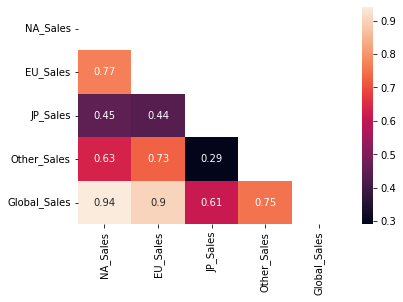

In [50]:
sales_df = video_game_df.iloc[:,-5:]
corr_matrix = sales_df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot = True, mask = mask)

* Identify the pair of distinct variables (excluding one-to-one correlations like NA_Sales with NA_Sales) that have the strongest correlation.

The pair that has the strongest correlation is NA_Sales and Global_Sales.

* Identify the pair of distinct variables that have the weakest correlation (the value closest to 0).

The pair that has the weakest correlation is JP_Sales and Other_Sales.

**4. Interpretation**: Provide a brief interpretation of the correlation findings. Discuss why you think these particular pairs of variables have the strongest and weakest correlations.

According to this matrix, North American sales and global sales are highly correlated. It may be interesting to see the percentage of global sales are North American sales--if it's a high percentage then it may be that North American sales are just such a large amount of global sales. 

In [52]:
video_game_df.NA_Sales.sum() / video_game_df.Global_Sales.sum()

0.49245889216227007

North American sales being almost half of all global sales supports this theory as a contributing reason to why there is a high correlation between these variables. 

Another theory is that North American sales drive global sales because North America has a strong influence globally. Said in another way--if it's popular in North America, it will likely be trending throughout the world.

The weakest correlation being between JP_Sales and Other_Sales seems to be a result of there not being a relationship between these types of sales. This makes sense, there is no reason for there to be a relationship between what sells in Japan and what sells in the countries grouped into the Other_Sales variable. This makes further sense when another observation is made: JP_Sales and Global_Sales has a very moderate correlation. Japan's sales do not directly follow global trends. 